In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [2]:
import matplotlib as mpl

In [3]:
import vehicleDetection

/home/tsbertalan/.virtualenvs/carnd/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from vehicleDetection.temporal import *

# Load and look at the training data.

In [5]:
images, classes = vehicleDetection.data.getData(numLighter=0, numFlip=0)
imageWindows = images
windowClasses = classes

HBox(children=(IntProgress(value=0, max=6726), HTML(value='')))

# Train the classifier on the full dataset with the best classifier parameters.

In [6]:
detectorNoAug = vehicleDetection.detector.Detector()

Got scalar parameter (gamma). Assuming no CV requested.


In [7]:
%%time

indices = np.arange(len(images))
np.random.shuffle(indices)
# Fit time here is roughly linear in n.
n = 1024
imageWindows = [images[i] for i in indices[:n]]
windowClasses = [classes[i] for i in indices[:n]]



CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 3.85 ms


In [8]:
spi = (3*60 + 59) / (6053 + 673)
print('Estimated fit/test runtime is %.3g minutes.' % (len(imageWindows) * spi / 60.,))

Estimated fit/test runtime is 0.606 minutes.


In [9]:
%%time
detectorNoAug.fit(
    imageWindows,
    windowClasses,
)

/home/tsbertalan/.virtualenvs/carnd/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


920-image train accuracy of clf =  0.95652173913
104-image test accuracy of clf =  0.932692307692
CPU times: user 15.9 s, sys: 100 ms, total: 16 s
Wall time: 16.4 s


# Run the detector on a test image.

In [10]:
maxf = 4
testh = HeatVideo(maxFrames=maxf)
projh = HeatVideo(fpath='../../../data/vehicleDetection/project_video.mp4', maxFrames=maxf)

In [11]:
# from IPython.core.debugger import set_trace; set_trace()
testh.go(detectorNoAug);

Number of support vectors for each class: [332 329]


HBox(children=(IntProgress(value=0, description='processing: ', max=4), HTML(value='')))

/home/tsbertalan/.virtualenvs/carnd/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [12]:
# def cooling(heatSources, heatTransferCoefficient=9, heatCapacity=10, dt=1, powerFactor=2, coolingRate=30, firstTemps=None):
#     """Model exponential heat decay with source injections.

#     Model heat decay at each pixel using
#         dudt = (heatTransferCoefficient * A * (0 - u(t)) + h(t)) / heatCapacity
#     where A is assumed to be 1 m**2

#     Parameters
#     ----------
#     heatSources : list of ndarray
#         Heat source images, units are W.
#     heatTransferCoefficient : float
#         Rate at which heat leaks from each pixel; units are W/m**2/K
#     heatCapacity : float
#         How much thermal inertia the pixels have; units are J/K
#     dt : float
#         Duration of each step in the simulation; units are s, but not actual video s.
#     powerFactor : float
#         How much power each detection has; units W/detection.
#     coolingRate : float
#         Static cooling; units W.
#     firstTemps : ndarray
#         Initial condition for temperature field, units are K.
#         Defaults to zeros of same shape as first heatSources array.

#     Returns
#     -------
#     u : list of ndarray
#         List of temperature arrays of length 1+len(heatSources); units are K.
#     """
#     def decay(u0, power):
#         """Euler time stepper/flow map"""
#         dudt = (power * powerFactor - heatTransferCoefficient * u0 - coolingRate) / heatCapacity
#         return u0 + dudt * dt

#     # Integrate the ODEs.
#     if firstTemps is None:
#         firstTemps = np.zeros_like(heatSources[0])
#     u = [firstTemps]
#     for heat in heatSources:
#         u.append(decay(u[-1], heat))
#         u[-1][u[-1] < 0] = 0

#     u = np.stack(u)
#     return u

# def persist(self, Tthresh=8):
#     # Post-process the heat sources to get persistent bounding boxes.self.labels = []
#     self.temperatures = cooling(self.heatSources, **self.coolingKwargs)[1:]

#     def getBboxes(T):
#         T = np.copy(T)
#         T[T < Tthresh] = 0
#         return vehicleDetection.drawing.labeledBboxes(label(T))

#     self.persistentBboxes = [
#         getBboxes(temperature)
#         for temperature in tqdm.tqdm_notebook(
#             self.temperatures,
#             desc='persist bboxes', unit='frame'
#         )
#     ]

In [13]:
testh.coolingKwargs = dict(
    heatTransferCoefficient = 1,
    coolingRate = 64,
    heatCapacity = 6,
    powerFactor = 10,
)

In [14]:
# persist(testh)

In [15]:
testh.persist(50)

HBox(children=(IntProgress(value=0, description='persist bboxes: ', max=4), HTML(value='')))

In [16]:
from importlib import reload
reload(vehicleDetection.drawing)

<module 'vehicleDetection.drawing' from '/mnt/wdblue/Dropbox/Projects/Vehicle Detection/vehicleDetection/drawing.py'>

In [17]:
testh.video();

HBox(children=(IntProgress(value=1, bar_style='info', description='test_video-detected.mp4: ', max=1), HTML(value='')))

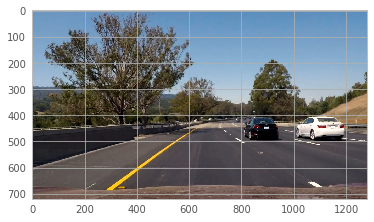

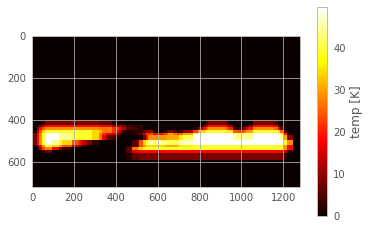

In [18]:
T = testh.temperatures[-1]
plt.imshow(testh.inputFrames[-1])
fig, ax = plt.subplots()
im = ax.imshow(T, origin='upper', cmap='hot')
fig.colorbar(im, label='temp [K]')

[]

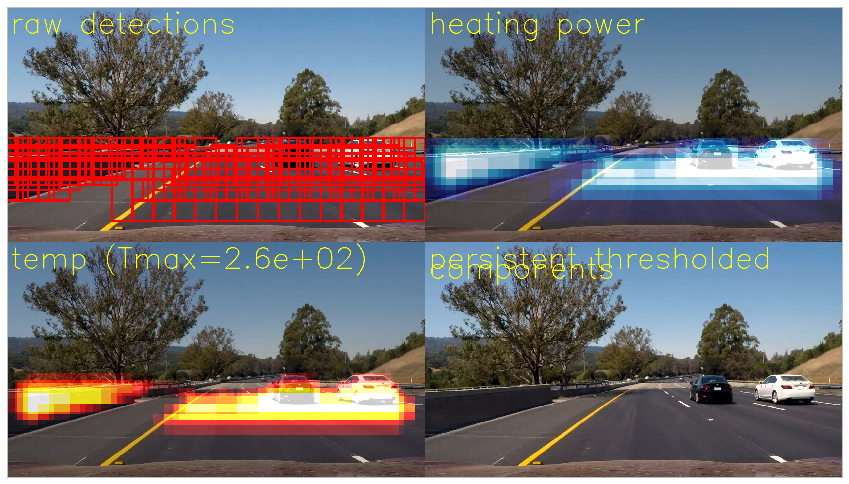

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(testh.vidFrame)
ax.set_xticks([])
ax.set_yticks([])

In [20]:
break

SyntaxError: 'break' outside loop (<ipython-input-20-6aaf1f276005>, line 1)

In [ ]:
projh.go(detectorNoAug);

In [ ]:
projh.video();

In [ ]:
break

Try again on the agumented data.

In [ ]:
images, classes = vehicleDetection.data.getData()

In [ ]:
detectorAug = vehicleDetection.detector.Detector()

In [ ]:
%%time
detectorAug.fit(
    images,
    classes,
)

In [ ]:
testha = HeatVideo()
testha.go(detectorAug, label='-augmented')

In [ ]:
projha = HeatVideo(fpath='../../../data/vehicleDetection/project_video.mp4',)
projha.go(detectorAug, label='-augmented')